In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
for w in words[:1]:
    print(w)

emma


In [7]:
list(w)

['e', 'm', 'm', 'a']

# PART 1: BIGRAM LANGUAGE MODEL

In bigram language model, we always working with 2 chars at a time. We have 1 char and we are trying to predict the next char. We always look for the previous char to predict the next char.

In [8]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


We know that "e" is the first word, and "a" is the last. For that:

In [9]:
for w in words[:1]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


<S e is the bigram of the start char. a <E is the bigram of the last char.

In order to learn about the statistics for which chars follow other chars, the simplest way is to do counting. So, we basically count how often any one of these chars will occur in training set.

In [10]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

New Key Creation:
If bigram is not already a key in b, the method b.get(bigram, 0) returns 0 because the default value 0 is specified. Then, 0 + 1 is computed, and the result (1) is assigned to b[bigram]. This creates a new key in b with the bigram as its key and 1 as its count.

Updating Existing Key:
If the bigram already exists in the dictionary, its current count is returned, incremented by 1, and then the updated count is stored back in b[bigram].

In [11]:
sorted(b.items(), key = lambda kv: -kv[1])

# default dict sorting is by first item which is key, we want to sort by second item
# which is value and we want to sort azalan.

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

# TORCH

A better way to store this information instead of dictionary is to store it in a 2D array.

Rows are going to be 1st chars of bigram and columns are going to be 2nd chars. Each entry will tell us how often the 2nd follows the first.


In [12]:
import torch

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [13]:
a = torch.zeros(3,5)

In [14]:
print(a)
print(a.dtype)
print(type(a))

# float 32 is single precision floating point numbers

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.float32
<class 'torch.Tensor'>


In [15]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [16]:
a[1,3] += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

So, let's start.

In [17]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [18]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i for i, s in enumerate(chars)}

In [19]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [20]:
stoi['<S>'] = 26
stoi['<E>'] = 27

In [21]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

# N is the array that stores the counts.

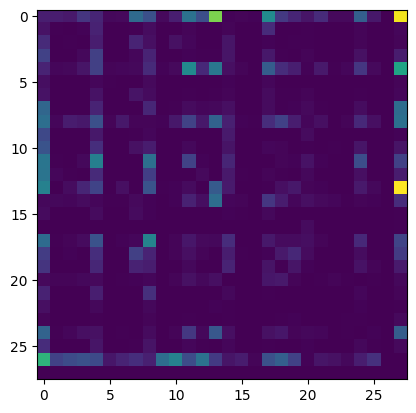

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [23]:
itos = {i:s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

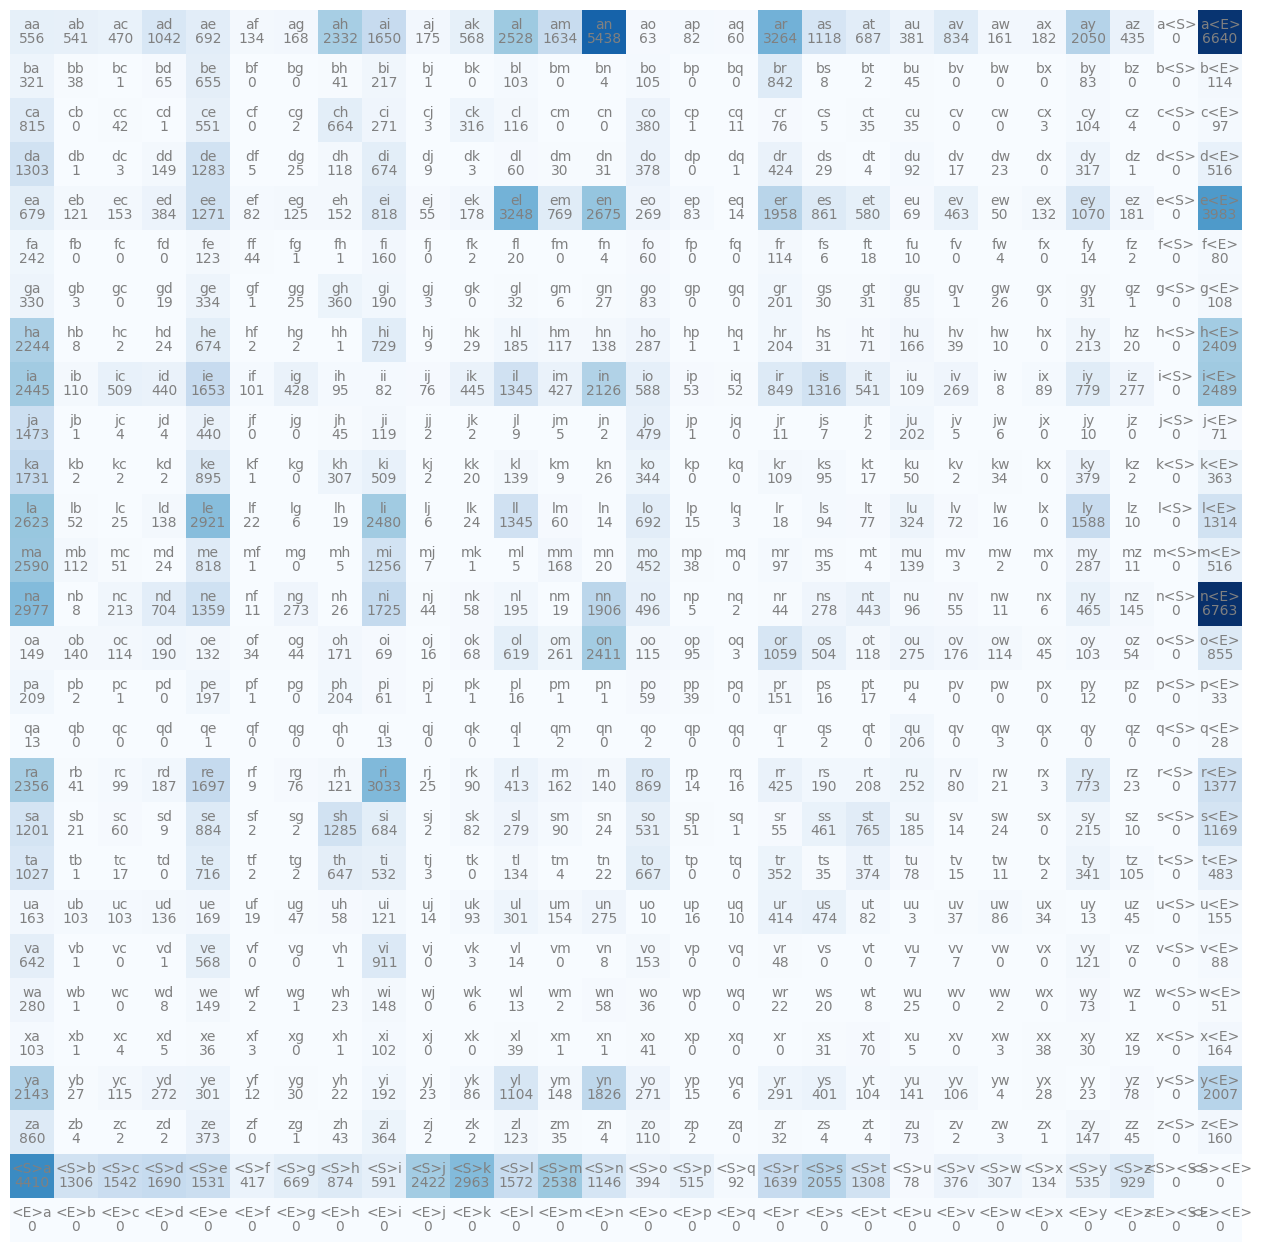

In [24]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

**This representation creates an entire row and column of 0. Because <E cannot be the first char, and <S cannot be the second char.**

In [25]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [26]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

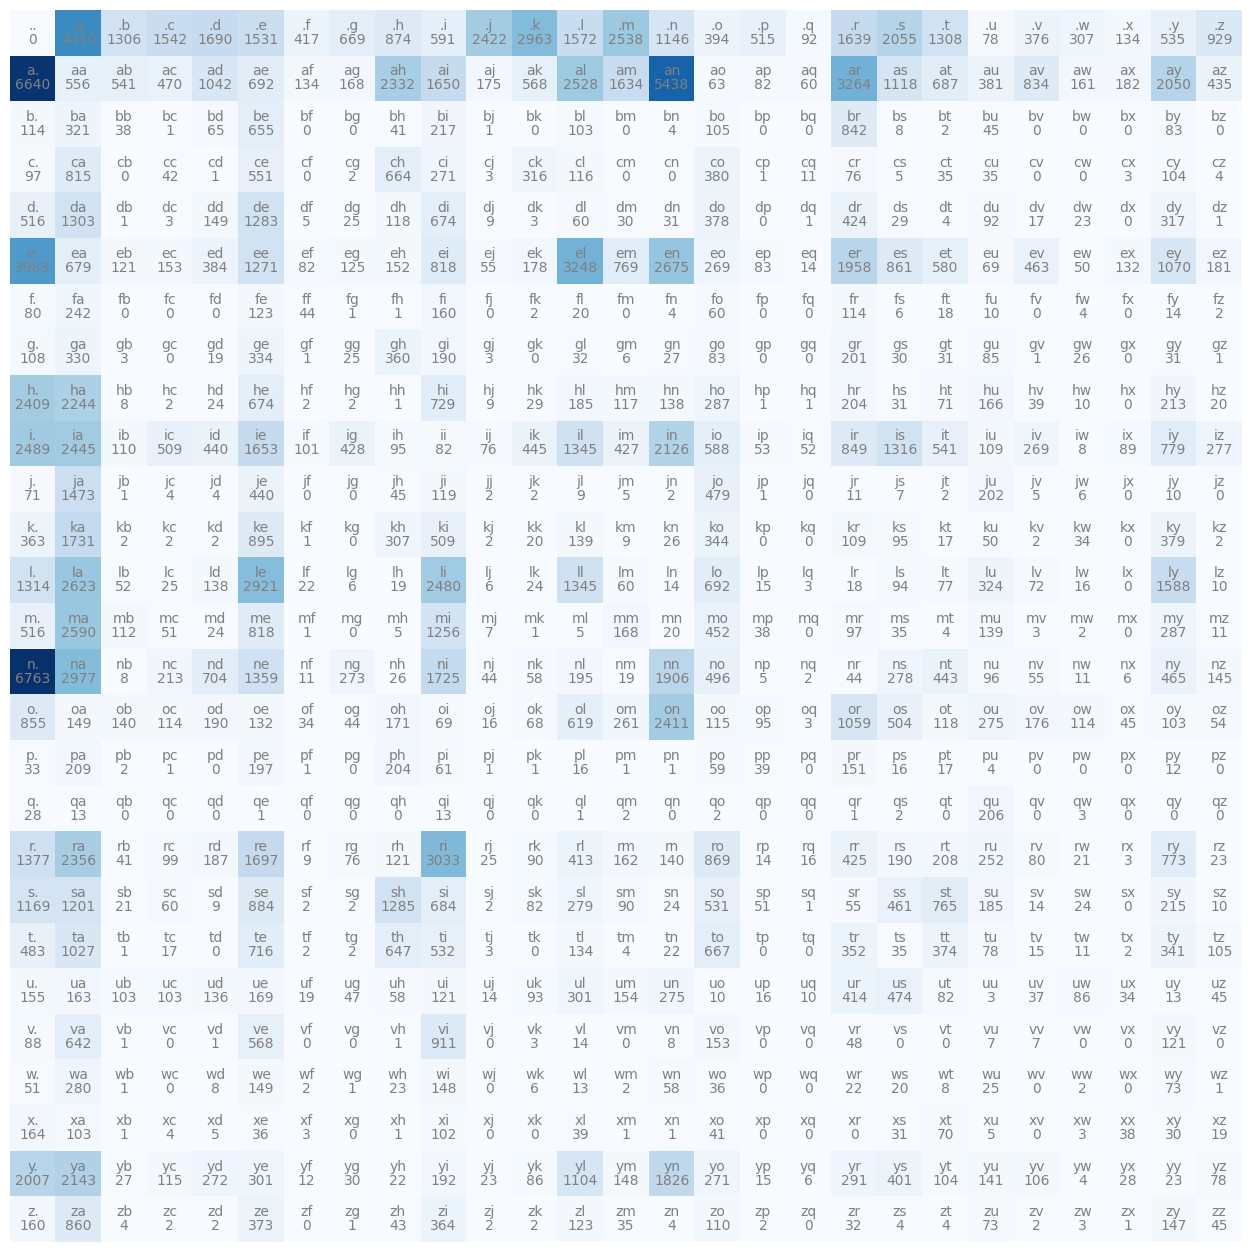

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

This is more clever.

The first rows tells us how often any of these chars will start a word.

In [28]:
N[0, :]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

These are the raw counts. Lets turn these into probabilities!

In [29]:
p = N[0].float()
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [30]:
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [31]:
p.sum()

tensor(1.)

So, now we have a good prob. distribution and it sums to 1.

# SAMPLE FROM PROB. DIST.

We'll use MULTINOMIAL DIST. 

Bernoulli Dist: The Bernoulli distribution is a special case of the binomial distribution with exactly one trial (i.e., 𝑛 = 1). 

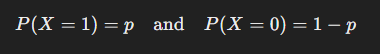

Binomial Distribution: 

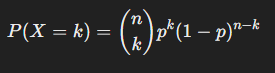


Multinomial Distribution: The multinomial distribution is a generalization of the binomial distribution to experiments where each trial can result in more than two outcomes. 

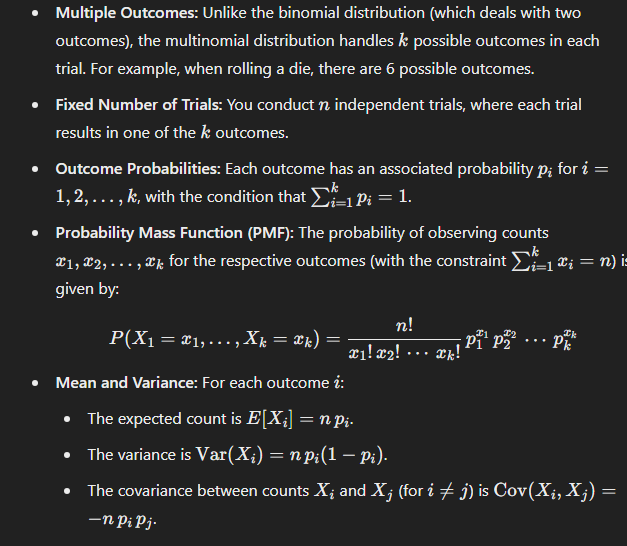




In [32]:
g = torch.Generator().manual_seed(2147483647) # to be deterministic.
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [33]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

Probability of the first number which is 0 is 0.60, so we expect %60 of them to be 0. But here we sampled 20 of them, so its not working well. More we sample, the more likely to we get %60 of them to be 0.

In [34]:
g = torch.Generator().manual_seed(2147483647) # to be deterministic.
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'.'

In [35]:
g = torch.Generator().manual_seed(2147483647) # to be deterministic.


for i in range(20):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


These are the name we sampled.

p = N[ix].float()

p = p / p.sum()

This process is actually quite inefficient. We are normalizing in the for loop again and again. So, instead of keeping the counts in N, we will keep the probabilities of each row (will sum up to 1) in P.


In [36]:
p.shape

torch.Size([27])

In [37]:
P = N.float()
P.shape

torch.Size([27, 27])

In [38]:
P.sum() # sum of all rows and cols of N

tensor(228146.)

In [39]:
P.sum(0) # sum of each col.

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [40]:
P.sum(1) # sum of each row.  how many times each character 
         # appears as the starting character in any pair.

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [41]:
P.sum(-2) # -1 is equivalent to dimension 1 (columns).
            # -2 is equivalent to dimension 0 (rows).

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [42]:
P.sum(0, keepdim=True).shape

torch.Size([1, 27])

In [43]:
P.sum(0, keepdim=False).shape

torch.Size([27])

In [44]:
P.sum(0, keepdim=True)

tensor([[32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
         17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
         12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.]])

In [45]:
P.sum(0, keepdim=False)

tensor([32033., 33885.,  2645.,  3532.,  5496., 20423.,   905.,  1927.,  7616.,
        17701.,  2900.,  5040., 13958.,  6642., 18327.,  7934.,  1026.,   272.,
        12700.,  8106.,  5570.,  3135.,  2573.,   929.,   697.,  9776.,  2398.])

In [46]:
P.sum(1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [47]:
P = N.float()
print(P.shape)

torch.Size([27, 27])


In [48]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

### So P has 27,27 shape and the above expr. has 27,1 shape. But it is still broadcastable. What it does when we dividing is, it copies 27,1 object 27 times along the columns to match the 27,27. Then it does element wise division.

In [49]:
P = N.float()
P = P / P.sum(1, keepdim=True)

In [50]:
P[0].sum() # this should be 1, because we normalize it.

tensor(1.)

In [51]:
P[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

Now its more efficient

In [52]:
g = torch.Generator().manual_seed(2147483647) # to be deterministic.


for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    print("".join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [53]:
# P = N.float()
# P = P / P.sum(1)

In [54]:
P[0].sum()

tensor(1.)

In [55]:
P[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [56]:
# g = torch.Generator().manual_seed(2147483647) # to be deterministic.


# for i in range(20):
#     out = []
#     ix = 0
#     while True:
#         p = P[ix]
#         ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
#         out.append(itos[ix])
#         if ix == 0:
#             break

#     print("".join(out))

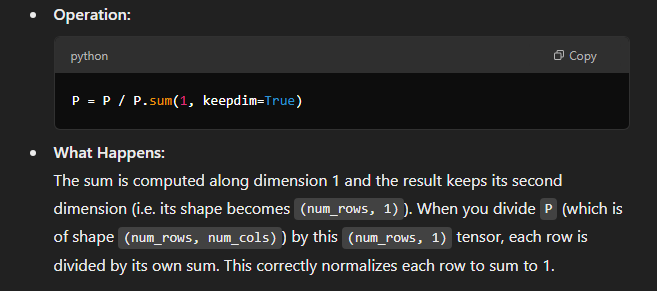

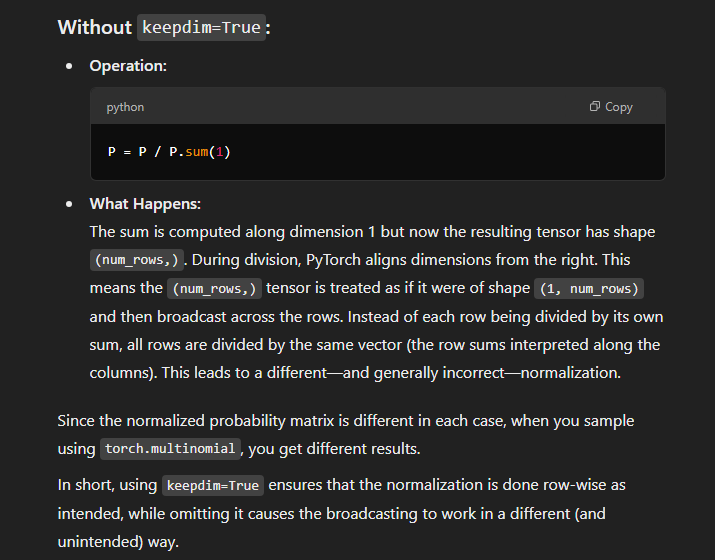


Yani aslında keepdim=True diyince her sütunu kendine bölüyosun toplam 27 kez. Diğer türlü satırı, aynı vektörün transpozuna bölüyosun. (1x27'lik). Bu da saçma sonuç veriyo.

# LOSS FUNCTION

We trained our bigram language model. Now we'd like to evaluate this model.

In [57]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f'{ch1}{ch2}: {prob:.4f}')

.e: 0.0478
em: 0.0377
mm: 0.0253
ma: 0.3899
a.: 0.1960
.o: 0.0123
ol: 0.0780
li: 0.1777
iv: 0.0152
vi: 0.3541
ia: 0.1381
a.: 0.1960
.a: 0.1377
av: 0.0246
va: 0.2495
a.: 0.1960


with 27 possible characters, if everything was equally likely, you'd expect all these probabilities to be 1/27.0 = 0.04. if any values are greater than 0.04, then it means that the model learnt something useful from these statistics.

How can we summarize these probabilities into a single model that measures the quality of the model?

### MAX. LIKELIHOOD ESTIMATION

The product of all these probabilities is called *likelihood*. A good model has a likelihood near 1. But since the probabilities are all near 0, we wont get such number, instead we will get a number near 0. So, people often use LOG-LIKELIHOOD, not likelihood.

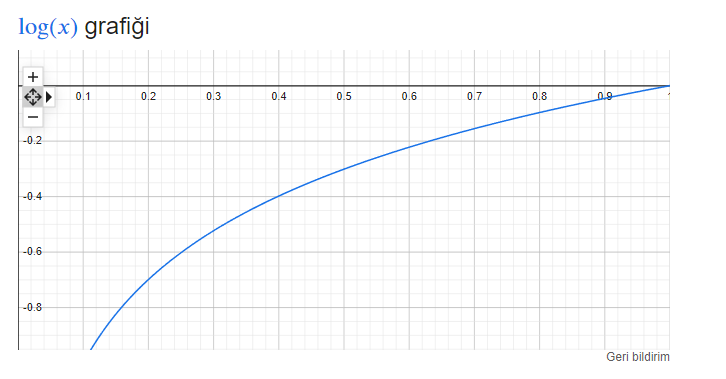

Log is a monotonic transformation of the probability. If you pass 1, you get 0. **log(prob(1)) = 0.**  As you get closer to 0, you get values closer to minus infinity.

In [58]:
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299


We said that the likelihood is the product of all the probabilities. So, log(a*b*c) = log(a) + log(b) + log(c). That means log-likelihood is the sum of the individual probabilities.

In [59]:
log_likelihood = 0.0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
log_likelihood=tensor(-38.7856)


Log likelihood is max. 0, and min is negative infinity. When all probabilites are 1, the log likelihood will be 0. And then all the probabilities are lower, this will grow up to negative infinity.

### LOSS FUNCTION (NEGATIVE LOG LIKELIHOOD)

Loss function has the semantics that the "low is good". We'll try to minimize it. So, negative log likelihood helps with that. 

In [60]:
log_likelihood = 0.0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
log_likelihood=tensor(-38.7856)
nll=tensor(38.7856)


Often people use normalized version of NLL.

In [61]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.e: 0.0478 -3.0408
em: 0.0377 -3.2793
mm: 0.0253 -3.6772
ma: 0.3899 -0.9418
a.: 0.1960 -1.6299
.o: 0.0123 -4.3982
ol: 0.0780 -2.5508
li: 0.1777 -1.7278
iv: 0.0152 -4.1867
vi: 0.3541 -1.0383
ia: 0.1381 -1.9796
a.: 0.1960 -1.6299
.a: 0.1377 -1.9829
av: 0.0246 -3.7045
va: 0.2495 -1.3882
a.: 0.1960 -1.6299
log_likelihood=tensor(-38.7856)
nll=tensor(38.7856)
2.424102306365967


So the quality of the model is 2.42. The lower it is the better the quality of the model. The job of our training is to find the parameters that minimize this loss function (NLL).

### SUMMARIZE

1. GOAL: maximize likelihood of the w.r.t. model parameters (statistical modeling)
2. equivalent to maximizing the log likelihood (because log is monotonic) (it just scales)
3. equivalent to minimizing the negative log likelihood
4. equivalent to minimizing the avg. negative log likelihood

log(a*b*c) = log(a) + log(b) + log(c)

### LOSS FUNCTION FOR THE ENTIRE DATASET

In [62]:
# FOR THE ENTIRE DATASET

log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
2.454094171524048


### LOSS FUNCTION FOR JUST ONE WORD

In [63]:
# FOR THE ENTIRE DATASET

log_likelihood = 0.0
n = 0
for w in ['andrej']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
j.: 0.0245 -3.7098
log_likelihood=tensor(-21.2735)
nll=tensor(21.2735)
3.03906512260437


The loss function is quite big for this one. 'andrej' is not very likely. It's because 'ej' has very low probability.

In [64]:
# FOR THE ENTIRE DATASET

log_likelihood = 0.0
n = 0
for w in ['andrejdfgdfgdfg']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
jd: 0.0014 -6.5862
df: 0.0009 -7.0023
fg: 0.0011 -6.8079
gd: 0.0099 -4.6193
df: 0.0009 -7.0023
fg: 0.0011 -6.8079
gd: 0.0099 -4.6193
df: 0.0009 -7.0023
fg: 0.0011 -6.8079
g.: 0.0560 -2.8816
log_likelihood=tensor(-77.7008)
nll=tensor(77.7008)
4.856301307678223


Worse than the previous one.

In [65]:
# FOR THE ENTIRE DATASET

log_likelihood = 0.0
n = 0
for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a: 0.1377 -1.9829
an: 0.1605 -1.8296
nd: 0.0384 -3.2594
dr: 0.0771 -2.5620
re: 0.1336 -2.0127
ej: 0.0027 -5.9171
jq: 0.0000 -inf
q.: 0.1029 -2.2736
log_likelihood=tensor(-inf)
nll=tensor(inf)
inf


Loss is inf, because 'jq' has 0.000 probability. That means j follows the q zero times.

### MODEL SMOOTHING WITH FAKE COUNTS

To avoid inf loss function, we can add fake counts to make sure no 0's in our probability matrix.

In [66]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [67]:
# FOR THE ENTIRE DATASET

log_likelihood = 0.0
n = 0
for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {log_prob:.4f}')

print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.a: 0.1376 -1.9835
an: 0.1604 -1.8302
nd: 0.0384 -3.2594
dr: 0.0770 -2.5646
re: 0.1334 -2.0143
ej: 0.0027 -5.9004
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log_likelihood=tensor(-27.8672)
nll=tensor(27.8672)
3.4834020137786865


It helps you uniform the model. The more you add the more uniform model you get. The less you add, the more peak model you get.

# PART 2: NEURAL NETWORK APPROACH

The loss function up to now is calculated based on the probabilities (counts of the values of the matrix). Now we'll use Neural Networks to predict, and minimize the loss function.

### Create the training set of all the bigrams (x, y)

In [68]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


This single word has 5 samples (bigrams) for our network.

In [69]:
xs

tensor([ 0,  5, 13, 13,  1])

In [70]:
ys

tensor([ 5, 13, 13,  1,  0])

Now, how we are going to feed in these samples to our NN? These are the indexes, we can't just plug in indexes to NN.

One common way is to use ONE-HOT-ENCODING

In [71]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [72]:
xs.shape, xenc.shape

(torch.Size([5]), torch.Size([5, 27]))

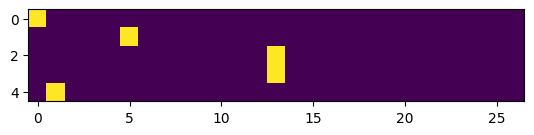

In [73]:
plt.imshow(xenc)

In [74]:
xs.dtype, xenc.dtype

(torch.int64, torch.int64)

We need to cast the xenc to float, because thats what we want in NN.

In [75]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [76]:
xs.dtype, xenc.dtype

(torch.int64, torch.float32)

### Constructing the first neuron

In [77]:
W = torch.randn(size=(27,1)) # 1 is here for 1 neuron.


# Returns a tensor filled with random numbers from a normal distribution with mean 0 and 
# variance 1 (also called the standard normal distribution).

In [78]:
W # a column vector of 27 numbers

tensor([[-1.2147],
        [-0.9423],
        [ 0.8265],
        [ 0.1585],
        [-0.1270],
        [ 0.1215],
        [ 0.5462],
        [ 0.2891],
        [-1.0744],
        [ 0.1701],
        [-1.8488],
        [ 1.7388],
        [-0.4825],
        [ 1.0516],
        [-2.3856],
        [-0.7126],
        [ 1.0225],
        [-0.3989],
        [ 1.2556],
        [ 1.2072],
        [-0.4466],
        [-1.1662],
        [ 0.7773],
        [ 1.2108],
        [-1.3005],
        [ 0.0283],
        [ 0.7183]])

In [79]:
xenc @ W # 5x27 @ 27x1 = 5x1

tensor([[-1.2147],
        [ 0.1215],
        [ 1.0516],
        [ 1.0516],
        [-0.9423]])

In [80]:
W = torch.randn(size=(27,27)) # 27 neurons
xenc @ W # 5x27 @ 27x27 = 5x27

tensor([[ 0.3800,  0.0477, -0.7686,  1.0571,  1.1385, -1.5358,  0.5855, -0.4504,
          0.1926, -0.7919, -1.9329, -1.9473, -1.3458,  0.4958, -0.5943, -0.1460,
         -2.1620, -0.5146,  1.1206, -1.8541, -0.8698, -0.1580, -0.3803,  0.8938,
          0.3386, -1.9907, -1.2854],
        [-0.0395,  2.0127, -1.2320, -1.7215,  0.7728, -0.2795,  0.1257,  1.6936,
         -1.9013,  1.1599,  1.6607, -0.4938, -0.1959, -0.5545, -2.1432,  1.1642,
         -0.3119, -0.6559, -0.9705,  0.3747, -0.8035,  1.2850, -0.8357,  1.0249,
          1.9797,  0.1113, -1.6089],
        [-1.8761,  0.2306,  0.4352,  0.1801, -1.1334, -0.1732, -1.2036,  0.7846,
          0.4005, -0.9963, -0.1597,  0.3592, -1.4483, -2.1103,  0.4875,  0.3415,
         -0.2804, -0.4087, -0.3500, -0.9927,  0.3681, -0.4556,  1.4390, -1.6595,
          0.2012,  0.8321, -1.7917],
        [-1.8761,  0.2306,  0.4352,  0.1801, -1.1334, -0.1732, -1.2036,  0.7846,
          0.4005, -0.9963, -0.1597,  0.3592, -1.4483, -2.1103,  0.4875,  0.3415

In [81]:
(xenc @ W)[3, 13]

tensor(-2.1103)

In [82]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
W[:, 13]

tensor([ 0.4958, -0.7436, -0.7332,  0.1596, -0.9110, -0.5545,  0.4451,  2.8415,
         1.4219,  0.0465, -1.1861, -0.3721, -1.1280, -2.1103,  0.5633, -0.3469,
        -0.2234, -0.7742, -0.3390,  0.5643, -0.9232,  0.2322, -0.2088,  1.1557,
        -1.9725,  0.1893,  1.0422])

In [84]:
(xenc[3] * W[:, 13]).sum()

tensor(-2.1103)

We'll build just a simple, single Linear Layer with no non-linearity etc.

We have 27 input neurons, and we need 27 outputs. Those outputs will be the probability distribution of the 27 characters (because we are predicting the next word).

So, in W, we have 27x27 random positive and negative numbers drawn from a normal distribution. But how do we get probabilities as outputs? The first matrix N we constructed has counts of their respective characters and normalized to probabilities in each row that sum up to 1. So they have a meaning. **Therefore, in W, we will have log counts to get some meaning.**

To achieve this we need exponentiation. In exp(x), if you plug-in negative numbers you get numbers always below 1 and it goes to 0. If you plug-in positive, then you get numbers greater than 1 and it goes to positive inf.


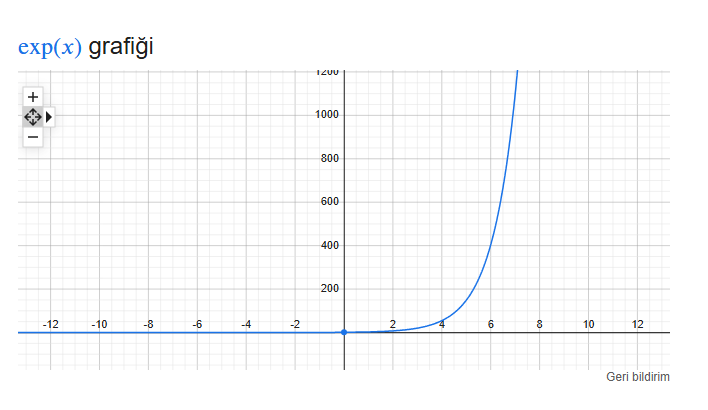

In [85]:
logits = xenc @ W # log-counts - LOGITS.
counts = logits.exp() # equivalent to N matrix.
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0541, 0.0388, 0.0171, 0.1064, 0.1154, 0.0080, 0.0664, 0.0236, 0.0448,
         0.0167, 0.0054, 0.0053, 0.0096, 0.0607, 0.0204, 0.0319, 0.0043, 0.0221,
         0.1134, 0.0058, 0.0155, 0.0316, 0.0253, 0.0904, 0.0519, 0.0051, 0.0102],
        [0.0188, 0.1460, 0.0057, 0.0035, 0.0422, 0.0147, 0.0221, 0.1061, 0.0029,
         0.0622, 0.1027, 0.0119, 0.0160, 0.0112, 0.0023, 0.0625, 0.0143, 0.0101,
         0.0074, 0.0284, 0.0087, 0.0705, 0.0085, 0.0544, 0.1412, 0.0218, 0.0039],
        [0.0055, 0.0450, 0.0552, 0.0427, 0.0115, 0.0300, 0.0107, 0.0782, 0.0533,
         0.0132, 0.0304, 0.0511, 0.0084, 0.0043, 0.0581, 0.0502, 0.0270, 0.0237,
         0.0252, 0.0132, 0.0516, 0.0226, 0.1505, 0.0068, 0.0437, 0.0820, 0.0059],
        [0.0055, 0.0450, 0.0552, 0.0427, 0.0115, 0.0300, 0.0107, 0.0782, 0.0533,
         0.0132, 0.0304, 0.0511, 0.0084, 0.0043, 0.0581, 0.0502, 0.0270, 0.0237,
         0.0252, 0.0132, 0.0516, 0.0226, 0.1505, 0.0068, 0.0437, 0.0820, 0.0059],
        [0.0353, 0.0261,

In [86]:
counts.shape

torch.Size([5, 27])

In [87]:
probs.shape

torch.Size([5, 27])

In [88]:
probs[0].sum() # every row sum to 1.

tensor(1.)

Now, for every one of our 5 examples, we have row with 27 NN outputs.

logits = xenc @ W # log-counts - LOGITS.

counts = logits.exp() # equivalent to N matrix.

probs = counts / counts.sum(1, keepdim=True)

All these are differentiable operations. Now we have inputs, we have differentiable operations that we can back-propagate through, and we getting out probability distributions.

Remember x is the first element, y is the second. 

In [89]:
probs[0]

tensor([0.0541, 0.0388, 0.0171, 0.1064, 0.1154, 0.0080, 0.0664, 0.0236, 0.0448,
        0.0167, 0.0054, 0.0053, 0.0096, 0.0607, 0.0204, 0.0319, 0.0043, 0.0221,
        0.1134, 0.0058, 0.0155, 0.0316, 0.0253, 0.0904, 0.0519, 0.0051, 0.0102])

This is the prob. distribution for the first input which is ".". As we tune the weights W, we will get different outcomes.

In [90]:
probs[0].shape

torch.Size([27])

In [91]:
probs[0].max() # This is the most likely character to follow the "."

tensor(0.1154)

### SUMMARY

In [92]:
xs

tensor([ 0,  5, 13, 13,  1])

In [93]:
ys

tensor([ 5, 13, 13,  1,  0])

1. Randomly initialize 27 neurons' weights. Each neuron receives 27 inputs.

In [94]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(size=(27,27), generator=g)

2. Encode the input, apply dot product to inputs with weights, apply softmax

This is the FORWARD-PASS. Every operation here is differentiable, we can back-prop. through. (except 1)

In [95]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts


counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for next char.

# btw: the last 2 lines here are called a softmax.

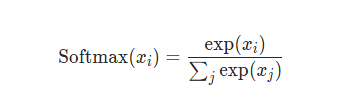

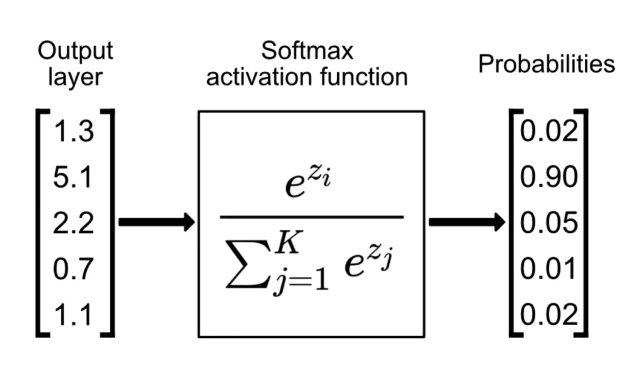

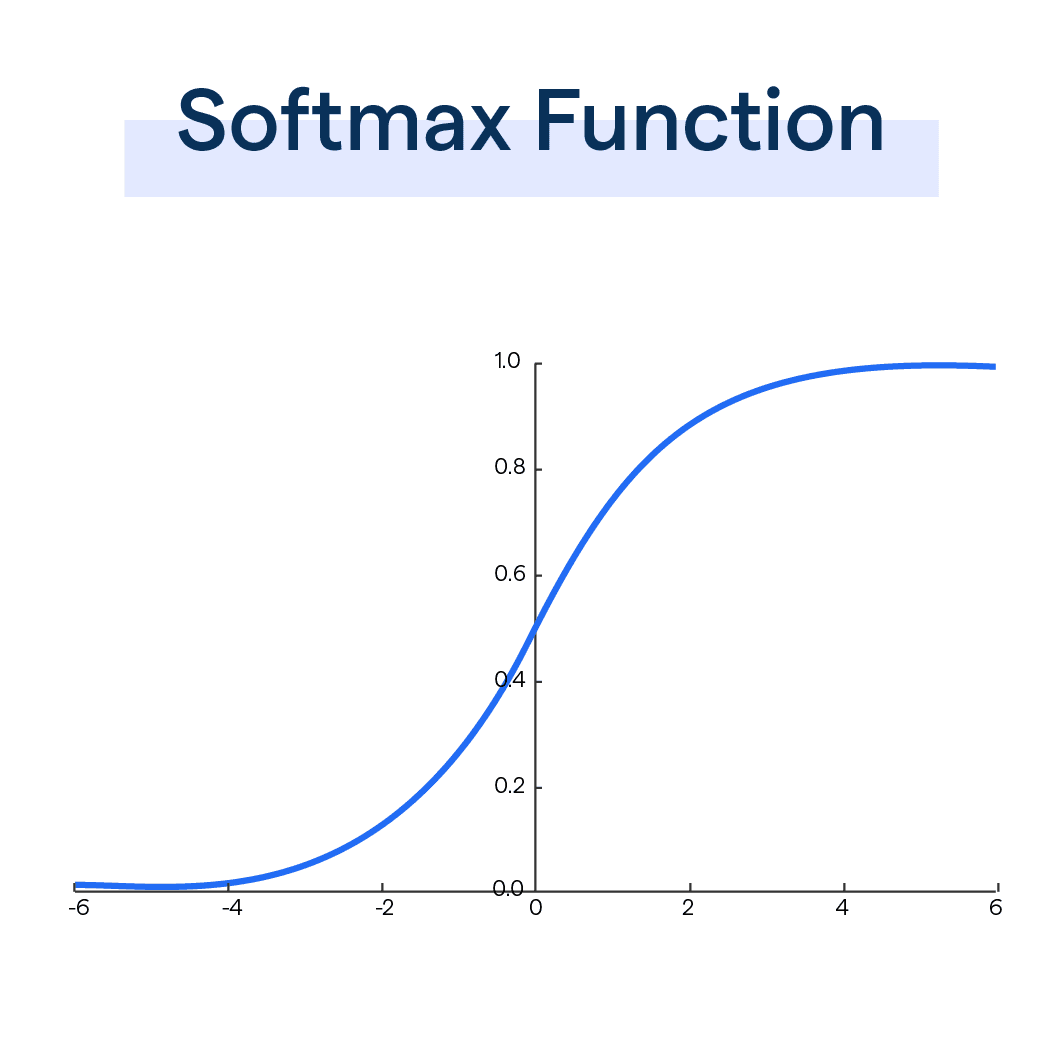

In [96]:
probs.shape

torch.Size([5, 27])

In [97]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input char. index
    y = ys[i].item()
    print('---------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next char.):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct char:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print("==============")
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

---------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next char.): 5
probability assigned by the net to the correct char: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
---------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next char.): 13
probability assigned by the net to the correct char: 0.018050700426101685
log

The minimum loss we get is in the bigram example 4: ma (indexes 13, 1). The x is "m" and the label is "a". The probability is 0.07 and the nll is 2.60.

### OPTIMIZATION - YAY -

In [98]:
xenc.shape, W.shape, logits.shape, counts.shape, probs.shape

(torch.Size([5, 27]),
 torch.Size([27, 27]),
 torch.Size([5, 27]),
 torch.Size([5, 27]),
 torch.Size([5, 27]))

In [99]:
probs

tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0150, 0.0086,

In [103]:
xs

tensor([ 0,  5, 13, 13,  1])

In [102]:
ys

tensor([ 5, 13, 13,  1,  0])

 ### 1. Randomly initialize 27 neurons' weights. Each neuron receives 27 inputs.


In [135]:
# 1. Randomly initialize 27 neurons' weights. Each neuron receives 27 inputs.

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) # because we'll do backward pass.

### 2. FORWARD PASS

Encode the input, apply dot product to inputs with weights, apply softmax

This is the FORWARD-PASS. Every operation here is differentiable, we can back-prop. through. (except 1)

In [136]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts


counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for next char.

# btw: the last 2 lines here are called a softmax.

The below are the probabilities assigned by NN to the next char.

In [137]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [138]:
# more efficient way to access:

probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [139]:
# We want negative log likelihood:

loss = - (probs[torch.arange(5), ys]).log().mean()
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [140]:
loss.shape

torch.Size([])

In [141]:
loss.item() # Returns the value of this tensor as a standard Python number.
# This only works for tensors with one element. 

3.7693049907684326

The loss is exactly the same as we get before. But this is vectorized form.

### 3. BACKWARD PASS

In [142]:
W.grad = None
W.grad

In [143]:
loss.backward()

In [144]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [145]:
W.shape, W.grad.shape

(torch.Size([27, 27]), torch.Size([27, 27]))

Every element of the W tells us the influence of that weight in the loss function.

For example the 0,0 th element of W is 0.0121. This would increase the loss because it's positive. It's like slightly nudging W as below:

W[0, 0] += h

### 4. UPDATE

In [146]:
W.data += -0.1 * W.grad # We only have 1 parameter, we did not inlude bias.

In [151]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W 
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = - probs[torch.arange(5), ys].log().mean()

W.grad = None
loss.backward()
W.data += -0.1 * W.grad

print(loss.item())

3.7091541290283203


Loss is decreased. We are now doing "gradient descent"

### 5. PUTTING EVERYTHING TOGETHER

For the entire dataset

In [163]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('num of examples', num)


# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

num of examples 228146


In [164]:
# gradient descent
for k in range(200):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -100 * W.grad

3.758953332901001
3.129453659057617
2.914114236831665
2.799959421157837
2.7337806224823
2.6869492530822754
2.6551642417907715
2.630599021911621
2.6211354732513428
2.607546806335449
2.6168410778045654
2.582136631011963
2.5751090049743652
2.567131519317627
2.581186294555664
2.5522050857543945
2.5510101318359375
2.54522442817688
2.5614418983459473
2.534615993499756
2.5359983444213867
2.531637668609619
2.549158811569214
2.523322820663452
2.525953531265259
2.5225727558135986
2.5409584045410156
2.515591621398926
2.5188539028167725
2.5161514282226562
2.535137891769409
2.510000467300415
2.5136003494262695
2.511373281478882
2.530787229537964
2.505772590637207
2.5095696449279785
2.5076775550842285
2.527402400970459
2.502464532852173
2.506389617919922
2.504737138748169
2.5246903896331787
2.4998090267181396
2.5038270950317383
2.502347707748413
2.5224719047546387
2.49763560295105
2.5017263889312744
2.5003747940063477
2.5206284523010254
2.4958293437957764
2.499979257583618
2.498723030090332
2.519077

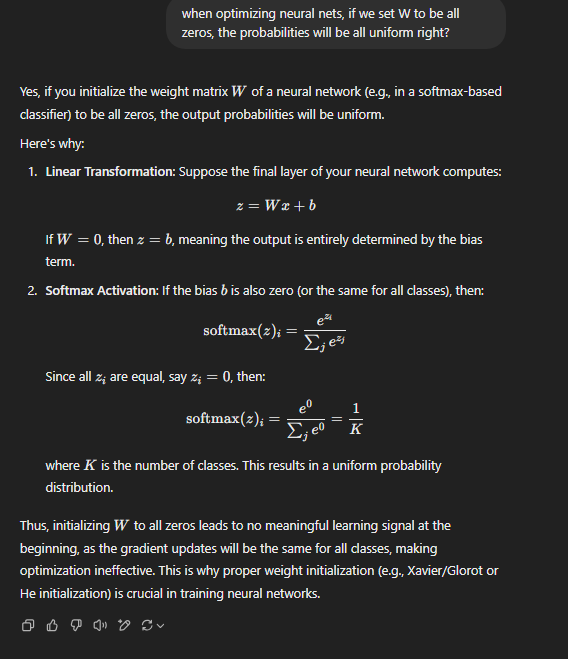

### L2 REGULARIZATION

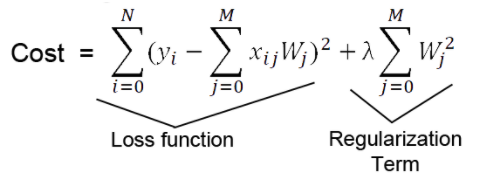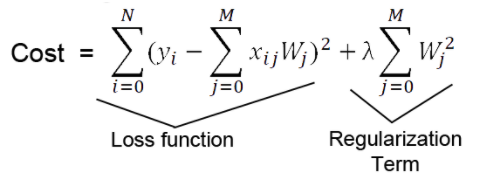

In [165]:
# gradient descent
for k in range(200):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() # *****
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -100 * W.grad

2.5118961334228516
2.5111138820648193
2.5319323539733887
2.507108449935913
2.51155424118042
2.510706901550293
2.53147554397583
2.5068564414978027
2.5113637447357178
2.5104095935821533
2.5311155319213867
2.506641149520874
2.511218786239624
2.5101842880249023
2.530837059020996
2.5064544677734375
2.51108717918396
2.510000467300415
2.530613899230957
2.5062897205352783
2.5109612941741943
2.50984263420105
2.5304291248321533
2.5061440467834473
2.5108418464660645
2.509704113006592
2.5302727222442627
2.506014347076416
2.5107297897338867
2.5095810890197754
2.530137062072754
2.5058982372283936
2.510625123977661
2.509470224380493
2.530017852783203
2.505793333053589
2.510529041290283
2.5093696117401123
2.529911994934082
2.5056991577148438
2.5104403495788574
2.509279251098633
2.5298166275024414
2.505613088607788
2.5103585720062256
2.5091960430145264
2.5297303199768066
2.5055344104766846
2.5102829933166504
2.509119749069214
2.5296518802642822
2.505462169647217
2.510213613510132
2.5090503692626953
2.5

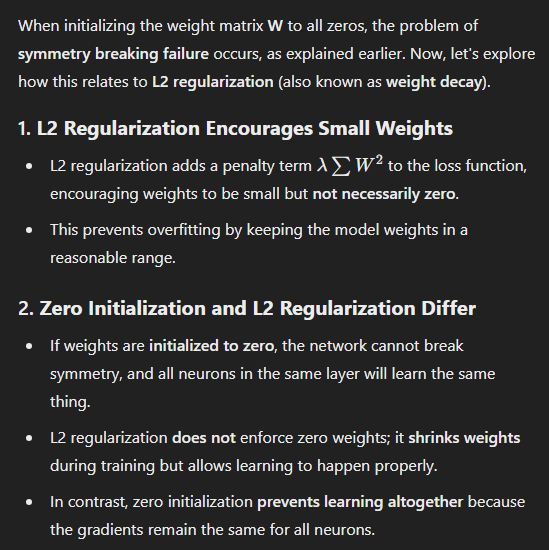

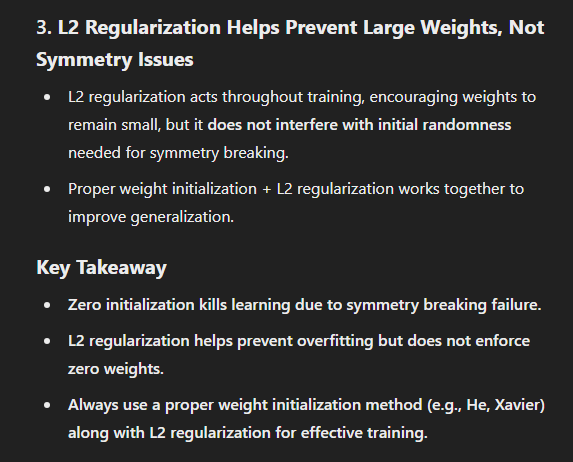